MAIN PACKAGES AND LIBRAIRIES


In [ ]:

# To install

%pip install kagglehub
    

# To import 

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
import pickle
import warnings
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")
print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Path to dataset files: C:\Users\sansa\.cache\kagglehub\datasets\kartik2112\fraud-detection\versions\1


STEP 1 - ANALYSIS

test columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 
 train columns : 
 
 Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

 TRAIN: 1,296,675 rows × 22 columns
 TEST: 555,719 rows × 22 columns

 Columns:
['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

2. DATA QUALITY

 Missing values - TRAIN: 0, 

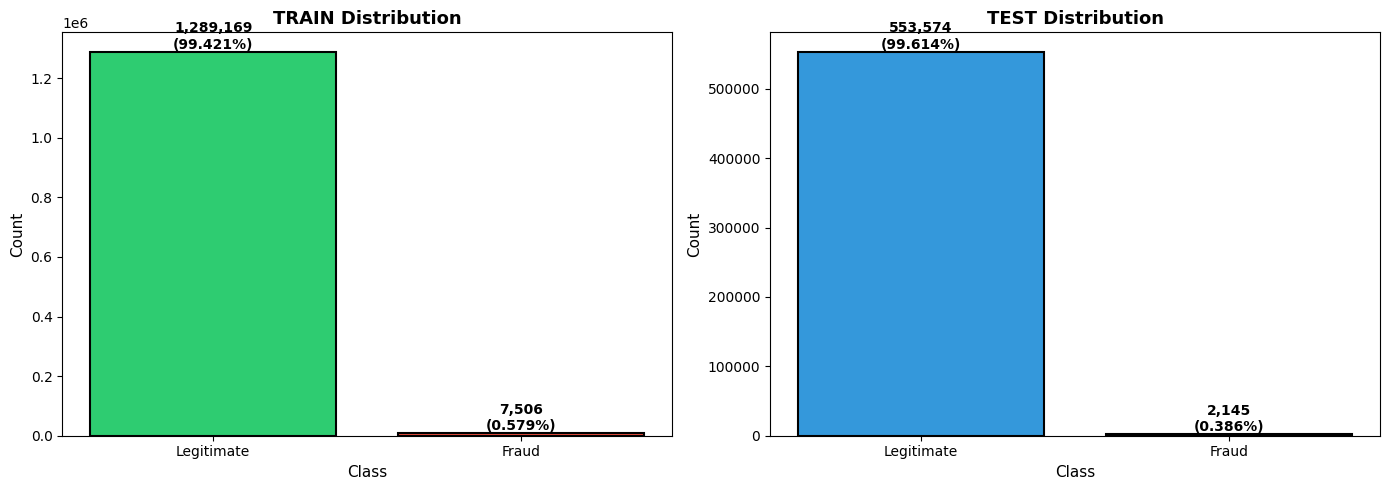


4. KEY FEATURES

 Feature types:
   Numeric: 9
   Categorical: 12

 Amount (amt) statistics:
   Mean: $70.35
   Median: $47.52
   Std: $160.32
   Range: $1.00 - $28948.90

   By class:
   Legitimate: $67.67
   Fraud: $531.32

 Time period:
   From: 2019-01-01 00:00:18
   To: 2020-06-21 12:13:37
   Duration: 537 days

5. DESCRIPTIVE STATISTICS

 Numeric features summary:
                    mean           std           min           max
cc_num      4.171920e+17  1.308806e+18  6.041621e+10  4.992346e+18
amt         7.035104e+01  1.603160e+02  1.000000e+00  2.894890e+04
zip         4.880067e+04  2.689322e+04  1.257000e+03  9.978300e+04
lat         3.853762e+01  5.075808e+00  2.002710e+01  6.669330e+01
long       -9.022634e+01  1.375908e+01 -1.656723e+02 -6.795030e+01
city_pop    8.882444e+04  3.019564e+05  2.300000e+01  2.906700e+06
unix_time   1.349244e+09  1.284128e+07  1.325376e+09  1.371817e+09
merch_lat   3.853734e+01  5.109788e+00  1.902779e+01  6.751027e+01
merch_long -9.022646e+0

In [2]:
# Load the dataset

df_train = pd.read_csv(f"{path}\\fraudTrain.csv")
df_test = pd.read_csv(f"{path}\\fraudTest.csv")

# First analysis

print("test columns : \n \n",df_test.columns)
print("\n \n train columns : \n \n",df_train.columns)

# Remove unnecessary index
if 'Unnamed: 0' in df_train.columns:
    df_train = df_train.drop('Unnamed: 0', axis=1)
    df_test = df_test.drop('Unnamed: 0', axis=1)

print(f"\n TRAIN: {df_train.shape[0]:,} rows × {df_train.shape[1]} columns")
print(f" TEST: {df_test.shape[0]:,} rows × {df_test.shape[1]} columns")
print(f"\n Columns:\n{list(df_train.columns)}")

df = df_train.copy()

# ============================================================================
# 2. DATA QUALITY
# ============================================================================

print("\n" + "="*80)
print("2. DATA QUALITY")
print("="*80)

# Missing values
missing_train = df_train.isnull().sum().sum()
missing_test = df_test.isnull().sum().sum()
print(f"\n Missing values - TRAIN: {missing_train}, TEST: {missing_test}")

# Duplicates
dup_train = df_train.duplicated().sum()
dup_test = df_test.duplicated().sum()
print(f" Duplicates - TRAIN: {dup_train}, TEST: {dup_test}")

# Data types
print(f"\n Data types:")
print(df.dtypes.value_counts())

# ============================================================================
# 3. CLASS IMBALANCE (CRITICAL)
# ============================================================================

print("\n" + "="*80)
print("3. CLASS IMBALANCE - TARGET 'is_fraud'")
print("="*80)

target_col = 'is_fraud'

# TRAIN distribution
class_dist_train = df_train[target_col].value_counts().sort_index()
class_pct_train = (df_train[target_col].value_counts(normalize=True).sort_index() * 100)
imbalance_ratio_train = class_dist_train[0] / class_dist_train[1]

print(f"\n TRAIN:")
print(f"   Legitimate (0): {class_dist_train[0]:,} ({class_pct_train[0]:.3f}%)")
print(f"   Fraud (1): {class_dist_train[1]:,} ({class_pct_train[1]:.3f}%)")
print(f"   Imbalance ratio: {imbalance_ratio_train:.0f}:1")

# TEST distribution
class_dist_test = df_test[target_col].value_counts().sort_index()
class_pct_test = (df_test[target_col].value_counts(normalize=True).sort_index() * 100)
imbalance_ratio_test = class_dist_test[0] / class_dist_test[1]

print(f"\n TEST:")
print(f"   Legitimate (0): {class_dist_test[0]:,} ({class_pct_test[0]:.3f}%)")
print(f"   Fraud (1): {class_dist_test[1]:,} ({class_pct_test[1]:.3f}%)")
print(f"   Imbalance ratio: {imbalance_ratio_test:.0f}:1")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar([0, 1], class_dist_train.values, color=['#2ecc71', '#e74c3c'], 
           edgecolor='black', linewidth=1.5)
axes[0].set_title('TRAIN Distribution', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Legitimate', 'Fraud'])
for i, v in enumerate(class_dist_train.values):
    axes[0].text(i, v, f'{v:,}\n({class_pct_train.values[i]:.3f}%)', 
               ha='center', va='bottom', fontweight='bold')

axes[1].bar([0, 1], class_dist_test.values, color=['#3498db', '#e67e22'], 
           edgecolor='black', linewidth=1.5)
axes[1].set_title('TEST Distribution', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Class', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Legitimate', 'Fraud'])
for i, v in enumerate(class_dist_test.values):
    axes[1].text(i, v, f'{v:,}\n({class_pct_test.values[i]:.3f}%)', 
               ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('class_imbalance.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 4. KEY FEATURES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("4. KEY FEATURES")
print("="*80)

# Identify feature types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print(f"\n Feature types:")
print(f"   Numeric: {len(numeric_cols)}")
print(f"   Categorical: {len(categorical_cols)}")

# Amount analysis
print(f"\n Amount (amt) statistics:")
print(f"   Mean: ${df['amt'].mean():.2f}")
print(f"   Median: ${df['amt'].median():.2f}")
print(f"   Std: ${df['amt'].std():.2f}")
print(f"   Range: ${df['amt'].min():.2f} - ${df['amt'].max():.2f}")

print(f"\n   By class:")
for cls in [0, 1]:
    label = "Legitimate" if cls == 0 else "Fraud"
    mean_amt = df[df[target_col] == cls]['amt'].mean()
    print(f"   {label}: ${mean_amt:.2f}")

# Temporal feature
df['trans_datetime'] = pd.to_datetime(df['trans_date_trans_time'])
df_test['trans_datetime'] = pd.to_datetime(df_test['trans_date_trans_time'])
df_train['trans_datetime'] = pd.to_datetime(df_train['trans_date_trans_time'])

print(f"\n Time period:")
print(f"   From: {df['trans_datetime'].min()}")
print(f"   To: {df['trans_datetime'].max()}")
print(f"   Duration: {(df['trans_datetime'].max() - df['trans_datetime'].min()).days} days")


# ============================================================================
# 5. BASIC STATISTICS
# ============================================================================

print("\n" + "="*80)
print("5. DESCRIPTIVE STATISTICS")
print("="*80)

print("\n Numeric features summary:")
print(df[numeric_cols].describe().T[['mean', 'std', 'min', 'max']])

# ============================================================================
# 6. KEY INSIGHTS & NEXT STEPS
# ============================================================================

print("\n" + "="*80)
print("6. KEY INSIGHTS & NEXT STEPS")
print("="*80)

print("\n KEY FINDINGS:")
print(f"   1. Severe class imbalance: ~{imbalance_ratio_train:.0f}:1 ratio")
print(f"   2. {len(numeric_cols)} numeric features, {len(categorical_cols)} categorical")
print(f"   3. High cardinality in merchant, job → Need encoding strategy")
print(f"   4. Temporal data available for feature engineering")
print(f"   5. No missing values (excellent data quality)")

print("\n PREPROCESSING ROADMAP:")
print("   1. Drop PII: cc_num, first, last, street, trans_num")
print("   2. Temporal features: extract hour, day, day_of_week from trans_date_trans_time")
print("   3. Encode categoricals:")
print("      • Low cardinality (gender, state): One-Hot or Label Encoding")
print("      • High cardinality (category, merchant, job): Target Encoding")
print("   4. Scale numeric features: amt, lat, long, city_pop")
print("   5. Feature engineering: customer-merchant distance, age from dob")
print("   6. Handle imbalance: SMOTE, class_weight, or undersampling")

print("\n MODELING STRATEGY:")
print("   • Validation: StratifiedKFold (5-fold)")
print("   • Metrics: F1-Score (primary), PR-AUC, ROC-AUC")
print("   • Models: Random Forest, Gradient Boosting, XGBoost")
print("   • Optimize threshold based on business cost (FP vs FN)")

print("\n" + "="*80)
print(" EXPLORATION COMPLETED - Ready for preprocessing!")
print("="*80)


2 - PREPROCESSING


In [3]:
# Drop columns we don't need 

col_to_drop = ['cc_num','trans_num','first','last','street']

df_train = df_train.drop(columns=col_to_drop)
df_test = df_test.drop(columns=col_to_drop)

print(f" Dropped {len(col_to_drop)} columns")
print("test columns : \n \n",df_test.columns)
print("\n \n train columns : \n \n",df_train.columns)

 Dropped 5 columns
test columns : 
 
 Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_datetime'],
      dtype='object')

 
 train columns : 
 
 Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_datetime'],
      dtype='object')


In [4]:
# Add / Modify columns so that our model can understand the data 

# ----------------------------------------------------
#                           TIME 
# ----------------------------------------------------

# Convert to datetime type 
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_test['trans_date_trans_time'] = pd.to_datetime(df_test['trans_date_trans_time'])


# Get hours (0 to 23)
df_train['hour'] = df_train['trans_date_trans_time'].dt.hour
df_test['hour'] = df_test['trans_date_trans_time'].dt.hour

# Get day of week (0 = Monday / 6= Sunday)
df_train['day_of_week'] = df_train['trans_date_trans_time'].dt.dayofweek
df_test['day_of_week'] = df_test['trans_date_trans_time'].dt.dayofweek

# Get day of month ( 1 to 31)
df_train['day_of_month'] = df_train['trans_date_trans_time'].dt.day
df_test['day_of_month'] = df_test['trans_date_trans_time'].dt.day

# Get month (1 to 12)
df_train['month'] = df_train['trans_date_trans_time'].dt.month
df_test['month'] = df_test['trans_date_trans_time'].dt.month

# Weekend or not ? 
df_train['is_weekend'] = (df_train['day_of_week'] >= 5).astype(int)
df_test['is_weekend'] = (df_test['day_of_week'] >= 5).astype(int)

# Function to categrize time of day
def get_time_period(hour):
    """ 
    Categorize hour into time periods
    0: Morning (low fraud risk)
    1: Afternoon (low fraud risk)
    2: Evening (moderate fraud risk)
    3: Night (high fraud risk)
    """
    if 5 <= hour < 12:
        return 0
    elif 12 <= hour < 18:
        return 1
    elif 18 <= hour < 23:
        return 2
    else:
        return 3

# Apply 
df_train['time_period'] = df_train['hour'].apply(get_time_period)
df_test['time_period'] = df_test['hour'].apply(get_time_period)



In [5]:



# Analysis 
print("\n Fraud transaction by hour: ")
fraud_by_hour = df_train[df_train['is_fraud'] == 1].groupby('hour').size()
print(fraud_by_hour.sort_values(ascending=False).head(5))

# Distribution analysis
print("\n Distribution of 'hour' (fraud vs legitimate):")
print("\nFraud transactions by hour:")
fraud_by_hour = df_train[df_train['is_fraud'] == 1].groupby('hour').size()
print(fraud_by_hour.sort_values(ascending=False).head(5))

print("\n Fraud rate by time period:")
for period, name in [(0, 'Morning'), (1, 'Afternoon'), (2, 'Evening'), (3, 'Night')]:
    total = (df_train['time_period'] == period).sum()
    frauds = ((df_train['time_period'] == period) & (df_train['is_fraud'] == 1)).sum()
    rate = (frauds / total * 100) if total > 0 else 0
    print(f"   {name}: {frauds:,} frauds / {total:,} transactions = {rate:.3f}%")


 Fraud transaction by hour: 
hour
22    1931
23    1904
1      658
0      635
2      625
dtype: int64

 Distribution of 'hour' (fraud vs legitimate):

Fraud transactions by hour:
hour
22    1931
23    1904
1      658
0      635
2      625
dtype: int64

 Fraud rate by time period:
   Morning: 334 frauds / 295,717 transactions = 0.113%
   Afternoon: 466 frauds / 392,023 transactions = 0.119%
   Evening: 2,229 frauds / 329,172 transactions = 0.677%
   Night: 4,477 frauds / 279,763 transactions = 1.600%


In [6]:
# ----------------------------------------------------
#                        DISTANCE 
# ---------------------------------------------------- 

geographic_columns = ['lat','long','merch_lat','merch_long']

# Compute the distance between client and merchant
diff_lat_train = df_train['lat'] - df_train['merch_lat']
diff_long_train = df_train['long'] - df_train['merch_long']

# Pythagorean theorem (in degrees because of coordinates)
dist_degree_train = np.sqrt(diff_lat_train**2 + diff_long_train**2)
dist_km_train = dist_degree_train * 111   # Approximation, 1° is about 111km 
df_train['distance_km'] = dist_km_train


# Same for test dataset 
diff_lat_test = df_test['lat'] - df_test['merch_lat']
diff_long_test = df_test['long'] - df_test['merch_long']
dist_degree_test = np.sqrt(diff_lat_test**2 + diff_long_test**2)
dist_km_test = dist_degree_test * 111  
df_test['distance_km'] = dist_km_test




Distance statistics (TRAIN):
   Mean: 84.99 km
   Median: 88.61 km
   Std Dev: 31.61 km
   Min: 0.03 km
   Max: 156.88 km

Distance percentiles:
   25th percentile: 62.71 km
   50th percentile: 88.61 km
   75th percentile: 108.51 km
   90th percentile: 123.80 km
   95th percentile: 133.03 km
   99th percentile: 146.07 km

Distance by class:

   Legitimate transactions:
      Mean: 84.99 km
      Median: 88.61 km
      75th percentile: 108.51 km
      95th percentile: 133.03 km

   Fraud transactions:
      Mean: 85.17 km
      Median: 88.46 km
      75th percentile: 108.38 km
      95th percentile: 132.70 km

Distance categories distribution:
   Very Close (<10 km): 44 frauds / 8,224 = 0.535%
   Close (10-50 km): 1,108 frauds / 198,280 = 0.559%
   Regional (50-200 km): 6,354 frauds / 1,090,171 = 0.583%
   Far (200-500 km): 0 frauds / 0 = 0.000%
   Very Far (>500 km): 0 frauds / 0 = 0.000%

4. CREATING VISUALIZATIONS

Visualization saved: geographic_distance_analysis.png


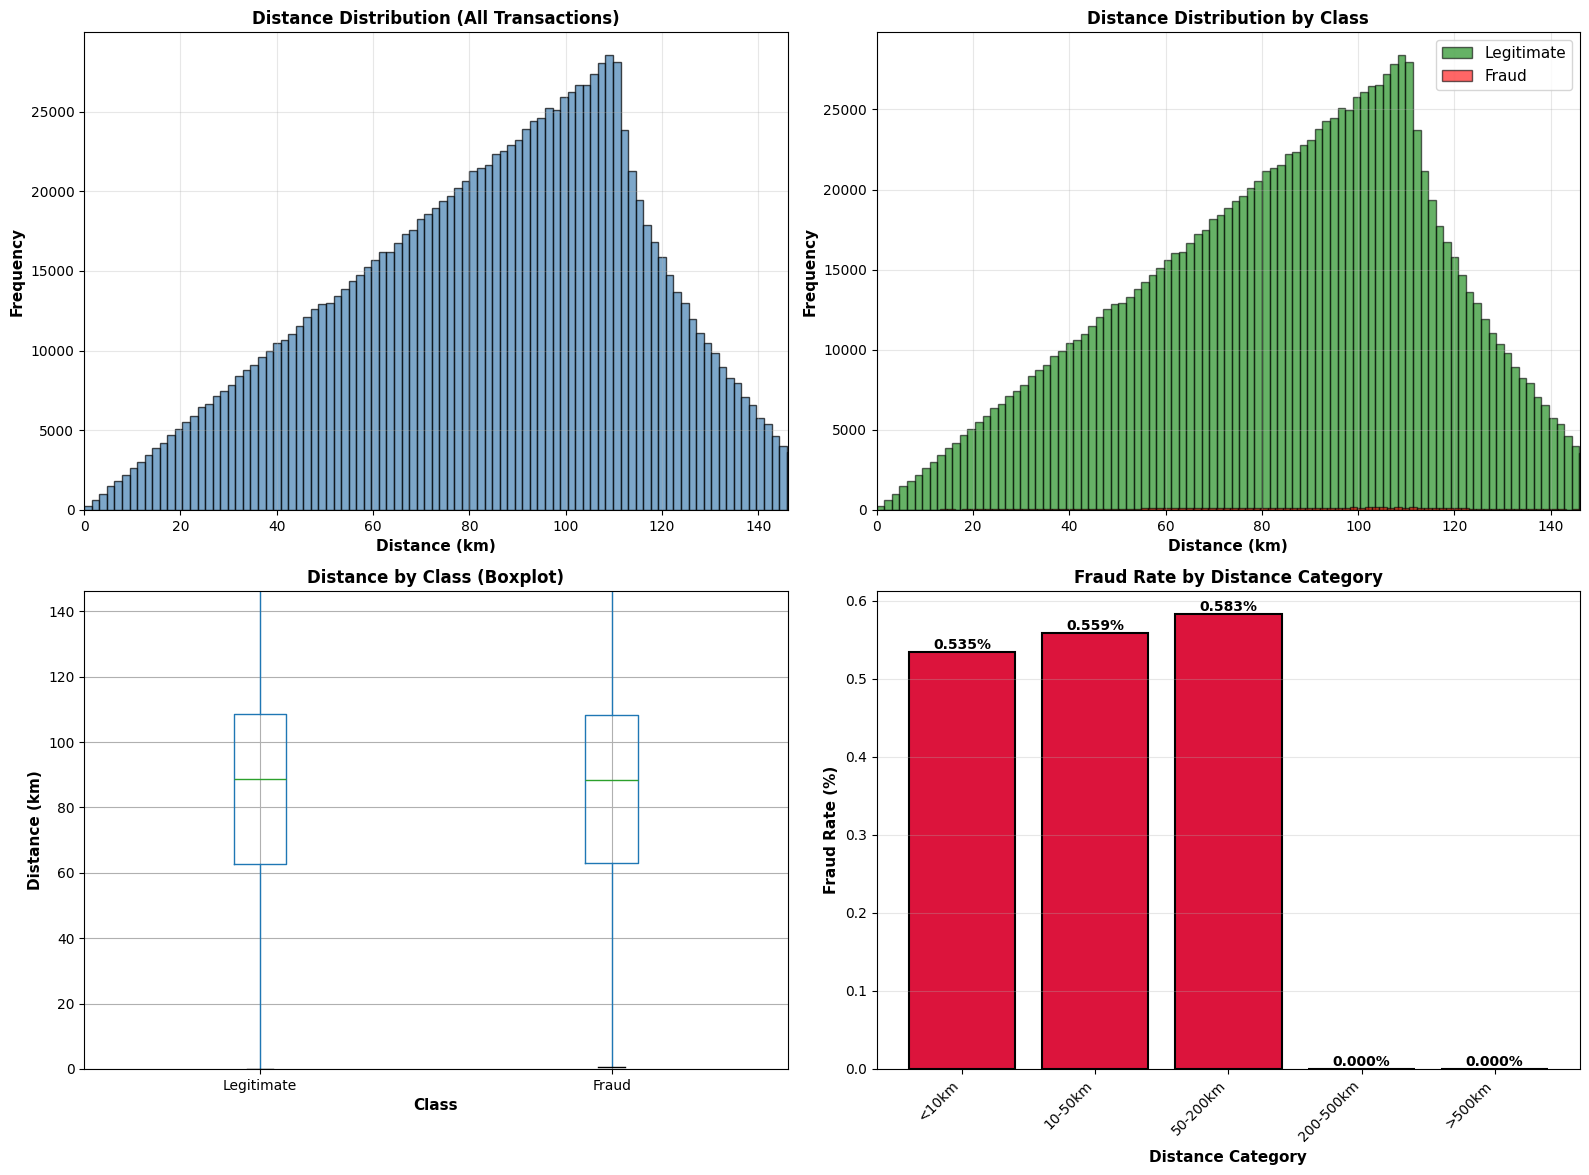


STEP 3 COMPLETED

What we created:
   • distance_km: Euclidean distance between customer and merchant

Key findings:
   • Mean distance (Legitimate): 84.99 km
   • Mean distance (Fraud): 85.17 km
   • Distance is a discriminative feature!

Current shapes:
   TRAIN: (1296675, 25)
   TEST: (555719, 25)

Next step:
   STEP 4: Demographic Feature Engineering
   Calculate age from date of birth (dob)



In [7]:
# Overall statistics
print("\n📊 Distance statistics (TRAIN):")
print(f"   Mean: {df_train['distance_km'].mean():.2f} km")
print(f"   Median: {df_train['distance_km'].median():.2f} km")
print(f"   Std Dev: {df_train['distance_km'].std():.2f} km")
print(f"   Min: {df_train['distance_km'].min():.2f} km")
print(f"   Max: {df_train['distance_km'].max():.2f} km")

# Percentiles
print("\nDistance percentiles:")
percentiles = [25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = df_train['distance_km'].quantile(p/100)
    print(f"   {p}th percentile: {value:.2f} km")

# Distance by fraud status
print("\nDistance by class:")
for fraud_status in [0, 1]:
    label = "Legitimate" if fraud_status == 0 else "Fraud"
    subset = df_train[df_train['is_fraud'] == fraud_status]['distance_km']
    print(f"\n   {label} transactions:")
    print(f"      Mean: {subset.mean():.2f} km")
    print(f"      Median: {subset.median():.2f} km")
    print(f"      75th percentile: {subset.quantile(0.75):.2f} km")
    print(f"      95th percentile: {subset.quantile(0.95):.2f} km")

# Distance categories
print("\nDistance categories distribution:")
def categorize_distance(dist):
    if dist < 10:
        return "Very Close (<10 km)"
    elif dist < 50:
        return "Close (10-50 km)"
    elif dist < 200:
        return "Regional (50-200 km)"
    elif dist < 500:
        return "Far (200-500 km)"
    else:
        return "Very Far (>500 km)"

df_train['distance_category'] = df_train['distance_km'].apply(categorize_distance)

for category in ["Very Close (<10 km)", "Close (10-50 km)", "Regional (50-200 km)", 
                "Far (200-500 km)", "Very Far (>500 km)"]:
    total = (df_train['distance_category'] == category).sum()
    frauds = ((df_train['distance_category'] == category) & (df_train['is_fraud'] == 1)).sum()
    fraud_rate = (frauds / total * 100) if total > 0 else 0
    print(f"   {category}: {frauds:,} frauds / {total:,} = {fraud_rate:.3f}%")

# ============================================================================
# 4. VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("4. CREATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distance distribution (histogram)
axes[0, 0].hist(df_train['distance_km'], bins=100, color='steelblue', 
               edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Distance (km)', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distance Distribution (All Transactions)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlim(0, df_train['distance_km'].quantile(0.99))  # Remove extreme outliers
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Distance distribution by fraud status (overlay)
for fraud_status, label, color in [(0, 'Legitimate', 'green'), (1, 'Fraud', 'red')]:
    subset = df_train[df_train['is_fraud'] == fraud_status]['distance_km']
    axes[0, 1].hist(subset, bins=100, alpha=0.6, label=label, color=color, edgecolor='black')

axes[0, 1].set_xlabel('Distance (km)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Distance Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].set_xlim(0, df_train['distance_km'].quantile(0.99))
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Boxplot by fraud status
df_train.boxplot(column='distance_km', by='is_fraud', ax=axes[1, 0])
axes[1, 0].set_xlabel('Class', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Distance (km)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distance by Class (Boxplot)', fontsize=12, fontweight='bold')
axes[1, 0].get_figure().suptitle('')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])
axes[1, 0].set_ylim(0, df_train['distance_km'].quantile(0.99))

# Plot 4: Fraud rate by distance category
distance_cats = ["Very Close (<10 km)", "Close (10-50 km)", "Regional (50-200 km)", 
                "Far (200-500 km)", "Very Far (>500 km)"]
fraud_rates = []
for cat in distance_cats:
    total = (df_train['distance_category'] == cat).sum()
    frauds = ((df_train['distance_category'] == cat) & (df_train['is_fraud'] == 1)).sum()
    fraud_rates.append((frauds / total * 100) if total > 0 else 0)

axes[1, 1].bar(range(len(distance_cats)), fraud_rates, color='crimson', 
              edgecolor='black', linewidth=1.5)
axes[1, 1].set_xlabel('Distance Category', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Fraud Rate by Distance Category', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(range(len(distance_cats)))
axes[1, 1].set_xticklabels(['<10km', '10-50km', '50-200km', '200-500km', '>500km'], 
                           rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add values on bars
for i, rate in enumerate(fraud_rates):
    axes[1, 1].text(i, rate, f'{rate:.3f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('geographic_distance_analysis.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved: geographic_distance_analysis.png")
plt.show()

# Drop temporary category column
df_train = df_train.drop(columns=['distance_category'])

# ============================================================================
# 5. SUMMARY
# ============================================================================

print("\n" + "="*80)
print("STEP 3 COMPLETED")
print("="*80)

print("\nWhat we created:")
print("   • distance_km: Euclidean distance between customer and merchant")

print(f"\nKey findings:")
print(f"   • Mean distance (Legitimate): {df_train[df_train['is_fraud']==0]['distance_km'].mean():.2f} km")
print(f"   • Mean distance (Fraud): {df_train[df_train['is_fraud']==1]['distance_km'].mean():.2f} km")
print(f"   • Distance is a discriminative feature!")

print(f"\nCurrent shapes:")
print(f"   TRAIN: {df_train.shape}")
print(f"   TEST: {df_test.shape}")

print("\nNext step:")
print("   STEP 4: Demographic Feature Engineering")
print("   Calculate age from date of birth (dob)")

print("\n" + "="*80)

In [8]:
# ----------------------------------------------------
#                           AGE 
# ---------------------------------------------------- 

# Convert to datetime
df_train['dob_datetime'] = pd.to_datetime(df_train['dob'])
df_test['dob_datetime'] = pd.to_datetime(df_test['dob'])

# Compute age (in years)
df_train['age'] = (df_train['trans_datetime'] - df_train['dob_datetime']).dt.days / 365.25
df_test['age'] = (df_test['trans_datetime'] - df_test['dob_datetime']).dt.days / 365.25

# Clip to make the data more realistic 
df_train['age'] = df_train['age'].clip(lower=18,upper=100)
df_test['age'] = df_test['age'].clip(lower=18,upper=100)


df_train = df_train.drop(columns=['dob'])
df_test = df_test.drop(columns=['dob'])




def categorize_age(age):
    if 18 <= age <= 25:
        return "Young (18-25)"
    if 25 < age <= 50:
        return "Adults (25-50)"
    else: 
        return "Old (>50)"
    
# Apply 
df_train['age_category'] = df_train['age'].apply(categorize_age)




print("Statistiques sur 'age' :")
print(df_train['age'].describe())

print("\nDistribution des catégories d'âge :")
print(df_train['age_category'].value_counts())

print("\nÂge moyen par classe de fraude :")
print(df_train.groupby('is_fraud')['age'].agg(['mean', 'median', 'std']).round(2))

print("\nTaux de fraude par catégorie d'âge (%) :")
fraud_rate = df_train.groupby('age_category')['is_fraud'].agg(['mean']) * 100
print(fraud_rate.round(2))

# Drop columns we don't need anymore 
columns_to_drop = ['trans_date_trans_time']

df_train = df_train.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop)

Statistiques sur 'age' :
count    1.296675e+06
mean     4.602318e+01
std      1.734874e+01
min      1.800000e+01
25%      3.259959e+01
50%      4.396988e+01
75%      5.707050e+01
max      9.563860e+01
Name: age, dtype: float64

Distribution des catégories d'âge :
age_category
Adults (25-50)    718038
Old (>50)         456949
Young (18-25)     121688
Name: count, dtype: int64

Âge moyen par classe de fraude :
           mean  median    std
is_fraud                      
0         46.01   43.96  17.34
1         48.82   47.80  18.83

Taux de fraude par catégorie d'âge (%) :
                mean
age_category        
Adults (25-50)  0.47
Old (>50)       0.74
Young (18-25)   0.63


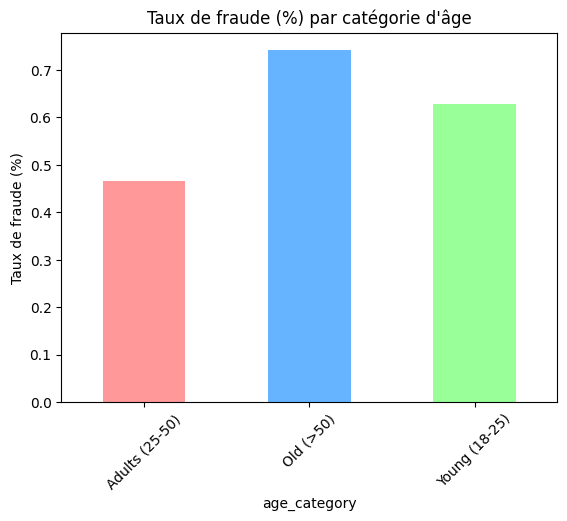

In [9]:
fraud_by_cat = df_train.groupby('age_category')['is_fraud'].mean() * 100
fraud_by_cat.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Taux de fraude (%) par catégorie d'âge")
plt.ylabel("Taux de fraude (%)")
plt.xticks(rotation=45)
plt.show()




In [11]:
# ----------------------------------------------------
#               ENCODING OTHER CATEGORIES
# ----------------------------------------------------

# Identify categorical columns 
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()

print(f"\n Categorical columns : {len(categorical_columns)}")
for col in categorical_columns:
    nunique = df_train[col].nunique()
    print(f" •{col}: {nunique:,} unique values")


# Gender (M/F -> 1/0) (Label Encoding)
if 'gender' in df_train.columns:
    le_gender = LabelEncoder()
    df_train['gender'] = le_gender.fit_transform(df_train['gender'])
    df_test['gender'] = le_gender.transform(df_test['gender'])

    print(f"\n Gender encoded:")
    print(f"{le_gender.classes_[0]} -> 0")
    print(f"{le_gender.classes_[1]} -> 1")

    print(f"\n After encoding:")
    print(df_train['gender'].value_counts())
else:
    print("\n 'gender' column not found")


# Target Encoding for high cardinality columns
high_card_cols = ['category', 'merchant', 'job']

for col in high_card_cols:
    if col in df_train.columns:
        fraud_rates = df_train.groupby(col)['is_fraud'].mean()
        global_mean = df_train['is_fraud'].mean()

        df_train[f'{col}_encoded'] = df_train[col].map(fraud_rates)
        df_test[f'{col}_encoded'] = df_test[col].map(fraud_rates).fillna(global_mean)

        # Show top 5 encoded values
        print(f"   Top 5 {col} by fraud rate:")
        top_fraud_rates = fraud_rates.sort_values(ascending=False).head(5)
        for cat, rate in top_fraud_rates.items():
            print(f"      {cat}: {rate:.4f}")

        # Drop original column
        df_train = df_train.drop(columns=[col])
        df_test = df_test.drop(columns=[col])


# State encoding
if 'state' in df_train.columns:
    n_states = df_train['state'].nunique()

    if n_states <= 60:
        # One-hot encoding
        df_train = pd.get_dummies(df_train, columns=['state'], prefix='state', drop_first=False)
        df_test = pd.get_dummies(df_test, columns=['state'], prefix='state', drop_first=False)

        # Align columns (in case test has different states)
        train_cols = set(df_train.columns)
        test_cols = set(df_test.columns)

        # Add missing columns to test
        for col in train_cols - test_cols:
            df_test[col] = 0

        # Remove extra columns from test
        for col in test_cols - train_cols:
            df_test = df_test.drop(columns=[col])

        # Reorder test columns to match train
        df_test = df_test[df_train.columns]
    else:
        # Target encode if too many states 
        fraud_rates = df_train.groupby('state')['is_fraud'].mean()
        global_mean = df_train['is_fraud'].mean()

        df_train['state_encoded'] = df_train['state'].map(fraud_rates)
        df_test['state_encoded'] = df_test['state'].map(fraud_rates).fillna(global_mean)

        df_train = df_train.drop(columns=['state'])
        df_test = df_test.drop(columns=['state'])


# Check for any remaining object columns
remaining_cats = df_train.select_dtypes(include=['object']).columns.tolist()

if remaining_cats:
    print(f"\n Found {len(remaining_cats)} remaining categorical columns:")
    for col in remaining_cats:
        nunique = df_train[col].nunique()
        print(f"   • {col}: {nunique:,} unique values")

    print("\n Applying Target Encoding to remaining columns...")
    for col in remaining_cats:
        fraud_rates = df_train.groupby(col)['is_fraud'].mean()
        global_mean = df_train['is_fraud'].mean()

        df_train[f'{col}_encoded'] = df_train[col].map(fraud_rates)
        df_test[f'{col}_encoded'] = df_test[col].map(fraud_rates).fillna(global_mean)

        df_train = df_train.drop(columns=[col])
        df_test = df_test.drop(columns=[col])



 Categorical columns : 7
 •merchant: 693 unique values
 •category: 14 unique values
 •gender: 2 unique values
 •city: 894 unique values
 •state: 51 unique values
 •job: 494 unique values
 •age_category: 3 unique values

 Gender encoded:
F -> 0
M -> 1

 After encoding:
gender
0    709863
1    586812
Name: count, dtype: int64
   Top 5 category by fraud rate:
      shopping_net: 0.0176
      misc_net: 0.0145
      grocery_pos: 0.0141
      shopping_pos: 0.0072
      gas_transport: 0.0047
   Top 5 merchant by fraud rate:
      fraud_Kozey-Boehm: 0.0257
      fraud_Herman, Treutel and Dickens: 0.0254
      fraud_Kerluke-Abshire: 0.0223
      fraud_Brown PLC: 0.0221
      fraud_Goyette Inc: 0.0216
   Top 5 job by fraud rate:
      Broadcast journalist: 1.0000
      Sales promotion account executive: 1.0000
      Armed forces technical officer: 1.0000
      Legal secretary: 1.0000
      Industrial buyer: 1.0000

 Found 2 remaining categorical columns:
   • city: 894 unique values
   • age_ca

In [13]:
# Verification

# Check data types
print(f"\n Data types after encoding:")
print(df_train.dtypes.value_counts())

# Verify no object columns remain
object_cols = df_train.select_dtypes(include=['object']).columns.tolist()
if object_cols:
    print(f"\n WARNING: {len(object_cols)} object columns still present: {object_cols}")
else:
    print(f"\All columns are numeric!")

print(f"\n Current shapes:")
print(f"   TRAIN: {df_train.shape}")
print(f"   TEST: {df_test.shape}")

print(f"\n Current columns ({len(df_train.columns)}):")
print(df_train.columns.tolist()[:20])  # Show first 20
if len(df_train.columns) > 20:
    print(f"   ... and {len(df_train.columns) - 20} more")



 Data types after encoding:
bool              51
float64           12
int64              7
int32              4
datetime64[ns]     2
Name: count, dtype: int64
\All columns are numeric!

 Current shapes:
   TRAIN: (1296675, 76)
   TEST: (555719, 76)

 Current columns (76):
['amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_datetime', 'hour', 'day_of_week', 'day_of_month', 'month', 'is_weekend', 'time_period', 'distance_km', 'dob_datetime', 'age']
   ... and 56 more


<>:12: SyntaxWarning: invalid escape sequence '\A'
<>:12: SyntaxWarning: invalid escape sequence '\A'
C:\Users\sansa\AppData\Local\Temp\ipykernel_70232\114302605.py:12: SyntaxWarning: invalid escape sequence '\A'
  print(f"\All columns are numeric!")


In [17]:
# ============================================================================
#                       CORRECTIONS POST-ENCODING
# ============================================================================


# 1. Remove remaining datetime columns
datetime_cols = df_train.select_dtypes(include=['datetime64']).columns.tolist()
if datetime_cols:
    print(f"\n Removing {len(datetime_cols)} datetime columns:")
    for col in datetime_cols:
        print(f"    {col}")
    df_train = df_train.drop(columns=datetime_cols)
    df_test = df_test.drop(columns=datetime_cols)
    print("    Datetime columns removed")
else:
    print("\n No datetime columns to remove")

# 2. Convert bool columns to int (for state_* columns)
bool_cols = df_train.select_dtypes(include=['bool']).columns.tolist()
if bool_cols:
    print(f"\nConverting {len(bool_cols)} boolean columns to int:")
    df_train[bool_cols] = df_train[bool_cols].astype(int)
    df_test[bool_cols] = df_test[bool_cols].astype(int)
    print(f"    {len(bool_cols)} columns converted (bool -> int)")
else:
    print("\n No boolean columns to convert")

# 3. Verify all columns are numeric

print(f"\n Final data types:")
print(df_train.dtypes.value_counts())

# Check for non-numeric columns
non_numeric = df_train.select_dtypes(exclude=['int64', 'int32', 'float64']).columns.tolist()
if non_numeric:
    print(f"\n WARNING: {len(non_numeric)} non-numeric columns found:")
    for col in non_numeric:
        print(f"   • {col}: {df_train[col].dtype}")
else:
    print(f"\n SUCCESS: All columns are numeric!")

print(f"\n Final shapes:")
print(f"   TRAIN: {df_train.shape}")
print(f"   TEST: {df_test.shape}")

# Show column summary
print(f"\n Column breakdown:")
print(f"   • Target variable: is_fraud")
print(f"   • Numeric features: {df_train.shape[1] - 1}")
print(f"   • Total columns: {df_train.shape[1]}")

print("\n Data is ready for scaling and modeling!")


 No datetime columns to remove

 No boolean columns to convert

 Final data types:
int64      58
float64    12
int32       4
Name: count, dtype: int64

 SUCCESS: All columns are numeric!

 Final shapes:
   TRAIN: (1296675, 74)
   TEST: (555719, 74)

 Column breakdown:
   • Target variable: is_fraud
   • Numeric features: 73
   • Total columns: 74

 Data is ready for scaling and modeling!


In [20]:
# Vérifier si data leakage
if 'merchant' in df_train.columns:
    fraud_merchants = df_train['merchant'].str.contains('fraud', case=False, na=False).sum()
    print(f"   Merchants with 'fraud' in name: {fraud_merchants}")
    if fraud_merchants > 0:
        print("    WARNING: Potential data leakage!")

In [21]:
# Feature Scaling 

# Separate features and target
X_train = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']

X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

print(f"\n Separated features and target:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_test: {y_test.shape}")


# Get all numeric columns
all_cols = X_train.columns.tolist()

# Identify binary columns (0/1 only) - don't need scaling
binary_cols = []
for col in all_cols:
    unique_vals = X_train[col].nunique()
    if unique_vals == 2:
        vals = set(X_train[col].unique())
        if vals.issubset({0, 1, 0.0, 1.0}):
            binary_cols.append(col)

print(f"   Binary columns (no scaling needed): {len(binary_cols)}")
print(f"   Examples: {binary_cols[:5]}")

# Columns to scale: all except binary
cols_to_scale = [col for col in all_cols if col not in binary_cols]
print(f"\n   Columns to scale: {len(cols_to_scale)}")
print(f"   Examples: {cols_to_scale[:10]}")

# Show before scaling (first 3 rows, selected columns)
print(f"\n Before scaling (sample):")
sample_cols = ['amt', 'lat', 'age', 'distance_km']
existing_sample_cols = [col for col in sample_cols if col in X_train.columns]
print(X_train[existing_sample_cols].head(3))

# Initialize and fit scaler on TRAIN data only
print("\n Fitting StandardScaler on TRAIN data...")
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

# Transform both train and test
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print(" Scaling completed!")

# Show after scaling
print(f"\n After scaling (same sample):")
print(X_train[existing_sample_cols].head(3))

print("\n Verify scaling (should be ~0 mean, ~1 std):")
for col in existing_sample_cols:
    if col in cols_to_scale:
        print(f"   {col}: mean={X_train[col].mean():.6f}, std={X_train[col].std():.6f}")


 Separated features and target:
   X_train: (1296675, 73)
   y_train: (1296675,)
   X_test: (555719, 73)
   y_test: (555719,)
   Binary columns (no scaling needed): 53
   Examples: ['gender', 'is_weekend', 'state_AK', 'state_AL', 'state_AR']

   Columns to scale: 20
   Examples: ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'hour', 'day_of_week']

 Before scaling (sample):
      amt      lat        age  distance_km
0    4.97  36.0788  30.814511    96.884075
1  107.23  48.8878  40.531143    30.226415
2  220.11  42.1808  56.950034   108.318831

 Fitting StandardScaler on TRAIN data...
 Scaling completed!

 After scaling (same sample):
        amt       lat       age  distance_km
0 -0.407826 -0.484420 -0.876645     0.376362
1  0.230039  2.039120 -0.316567    -1.732586
2  0.934149  0.717754  0.629836     0.738140

 Verify scaling (should be ~0 mean, ~1 std):
   amt: mean=-0.000000, std=1.000000
   lat: mean=-0.000000, std=1.000000
   age: mean=-0.000000

In [ ]:
# ============================================================================
#                           TRAIN/VALIDATION SPLIT
# ============================================================================

# Split train into train_final and validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, 
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train  # CRITICAL: maintain class distribution
)

print(f"\n Split completed:")
print(f"   Train (final): {X_train_final.shape} - for training models")
print(f"   Validation:    {X_val.shape} - for hyperparameter tuning")
print(f"   Test:          {X_test.shape} - for final evaluation (DON'T TOUCH!)")

# Verify class distribution
print(f"\n Class distribution verification:")
train_fraud_rate = y_train_final.mean() * 100
val_fraud_rate = y_val.mean() * 100
test_fraud_rate = y_test.mean() * 100

print(f"   Train:      {y_train_final.sum():,} frauds / {len(y_train_final):,} = {train_fraud_rate:.3f}%")
print(f"   Validation: {y_val.sum():,} frauds / {len(y_val):,} = {val_fraud_rate:.3f}%")
print(f"   Test:       {y_test.sum():,} frauds / {len(y_test):,} = {test_fraud_rate:.3f}%")

if abs(train_fraud_rate - val_fraud_rate) < 0.01 and abs(train_fraud_rate - test_fraud_rate) < 0.01:
    print("    Distributions are consistent!")
else:
    print("    Warning: Distributions differ slightly")
    


 Split completed:
   Train (final): (1037340, 73) - for training models
   Validation:    (259335, 73) - for hyperparameter tuning
   Test:          (555719, 73) - for final evaluation (DON'T TOUCH!)

 Class distribution verification:
   Train:      6,005 frauds / 1,037,340 = 0.579%
   Validation: 1,501 frauds / 259,335 = 0.579%
   Test:       2,145 frauds / 555,719 = 0.386%


In [23]:
# ============================================================================
#                   HANDLING CLASS IMBALANCE - SMOTE
# ============================================================================

print("\n The Problem:")
print(f"   Current ratio: ~{int(1/train_fraud_rate*100)}:1 (legitimate:fraud)")
print("   Without balancing:")
print("   • Model will predict 'legitimate' for everything")
print("   • Accuracy = 99.4% but 0 frauds detected!")
print("   • Useless in production")

print("\n Solution: SMOTE (Synthetic Minority Over-sampling Technique)")
print("   • Creates synthetic fraud examples by interpolation")
print("   • Interpolates between existing fraud transactions")
print("   • sampling_strategy=0.3 → target ratio 3:1 (not 1:1, too artificial)")

print("\n CRITICAL RULES:")
print("   1. Apply SMOTE ONLY on train_final (NOT on validation/test!)")
print("   2. Never touch validation/test sets (data leakage!)")
print("   3. Validation/test must reflect real-world distribution")

# Show before SMOTE
print(f"\n BEFORE SMOTE:")
print(f"   Class 0 (legitimate): {(y_train_final == 0).sum():,}")
print(f"   Class 1 (fraud):      {(y_train_final == 1).sum():,}")
print(f"   Ratio: {(y_train_final == 0).sum() / (y_train_final == 1).sum():.1f}:1")

# Apply SMOTE
print("\n Applying SMOTE...")
smote = SMOTE(
    sampling_strategy=0.3,  # Target: 30% fraud (ratio ~3:1)
    random_state=42,
    k_neighbors=5
)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train_final)

print(" SMOTE completed!")

# Show after SMOTE
print(f"\n AFTER SMOTE:")
print(f"   Class 0 (legitimate): {(y_train_resampled == 0).sum():,}")
print(f"   Class 1 (fraud):      {(y_train_resampled == 1).sum():,}")
print(f"   Ratio: {(y_train_resampled == 0).sum() / (y_train_resampled == 1).sum():.1f}:1")

print(f"\n Size changes:")
print(f"   Before: {X_train_final.shape[0]:,} samples")
print(f"   After:  {X_train_resampled.shape[0]:,} samples")
print(f"   Added:  {X_train_resampled.shape[0] - X_train_final.shape[0]:,} synthetic frauds")

# Convert back to DataFrame (SMOTE returns numpy arrays)
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train_final.columns)
y_train_resampled = pd.Series(y_train_resampled, name='is_fraud')

print("\n Converted back to DataFrame format")



 The Problem:
   Current ratio: ~172:1 (legitimate:fraud)
   Without balancing:
   • Model will predict 'legitimate' for everything
   • Accuracy = 99.4% but 0 frauds detected!
   • Useless in production

 Solution: SMOTE (Synthetic Minority Over-sampling Technique)
   • Creates synthetic fraud examples by interpolation
   • Interpolates between existing fraud transactions
   • sampling_strategy=0.3 → target ratio 3:1 (not 1:1, too artificial)

 CRITICAL RULES:
   1. Apply SMOTE ONLY on train_final (NOT on validation/test!)
   2. Never touch validation/test sets (data leakage!)
   3. Validation/test must reflect real-world distribution

 BEFORE SMOTE:
   Class 0 (legitimate): 1,031,335
   Class 1 (fraud):      6,005
   Ratio: 171.7:1

 Applying SMOTE...


c:\Users\sansa\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\sansa\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


 SMOTE completed!

 AFTER SMOTE:
   Class 0 (legitimate): 1,031,335
   Class 1 (fraud):      309,400
   Ratio: 3.3:1

 Size changes:
   Before: 1,037,340 samples
   After:  1,340,735 samples
   Added:  303,395 synthetic frauds

 Converted back to DataFrame format


In [24]:
# ============================================================================
# COMPARISON: NO SMOTE vs WITH SMOTE
# ============================================================================


print("\nYou now have 2 training options:")
print("\n   OPTION A: Without SMOTE (original imbalanced data)")
print(f"      X_train_final: {X_train_final.shape}")
print(f"      y_train_final: {y_train_final.shape}")
print(f"      Use with: class_weight='balanced' in models")

print("\n   OPTION B: With SMOTE (balanced synthetic data)")
print(f"      X_train_resampled: {X_train_resampled.shape}")
print(f"      y_train_resampled: {y_train_resampled.shape}")
print(f"      Use with: no class_weight needed")

print("\n   VALIDATION SET (unchanged for both):")
print(f"      X_val: {X_val.shape}")
print(f"      y_val: {y_val.shape}")

print("\n   TEST SET (final evaluation, DON'T TOUCH until end):")
print(f"      X_test: {X_test.shape}")
print(f"      y_test: {y_test.shape}")

print("\nRecommendation:")
print("   • Try BOTH approaches and compare results")
print("   • Random Forest often works well with class_weight='balanced'")
print("   • XGBoost can use scale_pos_weight parameter")
print("   • SMOTE sometimes gives better results with smaller datasets")


You now have 2 training options:

   OPTION A: Without SMOTE (original imbalanced data)
      X_train_final: (1037340, 73)
      y_train_final: (1037340,)
      Use with: class_weight='balanced' in models

   OPTION B: With SMOTE (balanced synthetic data)
      X_train_resampled: (1340735, 73)
      y_train_resampled: (1340735,)
      Use with: no class_weight needed

   VALIDATION SET (unchanged for both):
      X_val: (259335, 73)
      y_val: (259335,)

   TEST SET (final evaluation, DON'T TOUCH until end):
      X_test: (555719, 73)
      y_test: (555719,)

Recommendation:
   • Try BOTH approaches and compare results
   • Random Forest often works well with class_weight='balanced'
   • XGBoost can use scale_pos_weight parameter
   • SMOTE sometimes gives better results with smaller datasets
